In [1]:
import pandas as pd

In [3]:
n=100
rep=50
gen_m='zi' # hnb or zi
results_100=pd.read_csv(f'results_{gen_m}_n={n}_rep={rep}.csv')
results_r2_minus_100=pd.read_csv(f'results_r2_minus_{gen_m}_n={n}_rep={rep}.csv')
problmatic_para_100=pd.read_csv(f'problmatic_para_{gen_m}_n={n}_rep={rep}.csv')
err_100=pd.read_csv(f'err_{gen_m}_n={n}_rep={rep}.csv')

In [2]:
n=300
rep=50
gen_m='zi' # hnb or zi
results_300=pd.read_csv(f'results_{gen_m}_n={n}_rep={rep}.csv')
results_r2_minus_300=pd.read_csv(f'results_r2_minus_{gen_m}_n={n}_rep={rep}.csv')
problmatic_para_300=pd.read_csv(f'problmatic_para_{gen_m}_n={n}_rep={rep}.csv')
err_300=pd.read_csv(f'err_{gen_m}_n={n}_rep={rep}.csv')

In [4]:
n=1000
rep=50
gen_m='zi' # hnb or zi
results_1000=pd.read_csv(f'results_{gen_m}_n={n}_rep={rep}.csv')
results_r2_minus_1000=pd.read_csv(f'results_r2_minus_{gen_m}_n={n}_rep={rep}.csv')
problmatic_para_1000=pd.read_csv(f'problmatic_para_{gen_m}_n={n}_rep={rep}.csv')
err_1000=pd.read_csv(f'err_{gen_m}_n={n}_rep={rep}.csv')

In [5]:
results_1000

,Unnamed: 0,beta,gamma,alpha,p_0,p_k,p_p,y_mean,y_std,n_unique,...,RF_R2_test,RF_MSE_train,RF_MAE_train,RF_R2_train,GB_MSE_test,GB_MAE_test,GB_R2_test,GB_MSE_train,GB_MAE_train,GB_R2_train
0,0,-2.0,-2.0,-2.0,0.748571,0.218571,0.032857,0.692857,1.238951,4,...,0.063454,1.208522,0.839808,0.211562,1.293700,0.830307,0.004940,1.107960,0.791764,0.277169
1,1,-2.0,-2.0,-1.0,0.724286,0.211429,0.064286,0.727143,1.245814,5,...,0.079285,1.164265,0.806837,0.248781,1.444461,0.898941,0.106365,1.081891,0.771914,0.301931
2,2,-2.0,-2.0,0.0,0.672857,0.234286,0.092857,0.950000,1.446841,8,...,0.230010,1.397056,0.882866,0.331666,1.966243,0.996001,0.215539,1.282822,0.835526,0.386314
3,3,-2.0,-2.0,1.0,0.651429,0.182857,0.165714,2.674286,5.883433,31,...,0.456619,9.366542,1.559267,0.729019,28.591379,2.067082,0.491292,8.419221,1.471799,0.756426
4,4,-2.0,-2.0,2.0,0.647143,0.191429,0.161429,14.560000,64.638629,75,...,0.303979,2014.343189,10.269717,0.517197,6224.016740,12.320243,0.422298,1432.134316,8.712516,0.656742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2460,2.0,2.0,-2.0,0.648571,0.194286,0.157143,15.648571,76.190537,81,...,0.038239,3435.110378,10.767697,0.407403,289634.739629,39.106909,0.059667,2962.985202,9.784380,0.488850
2461,2461,2.0,2.0,-1.0,0.628571,0.238571,0.132857,2.658571,7.996727,32,...,0.568947,33.451910,1.926014,0.476138,14.770118,2.035643,0.499935,29.830203,1.821832,0.532854
2462,2462,2.0,2.0,0.0,0.674286,0.220000,0.105714,0.951429,1.493117,8,...,0.342787,1.481657,0.894935,0.334449,1.739820,0.936279,0.299248,1.304925,0.835579,0.413836
2463,2463,2.0,2.0,1.0,0.728571,0.208571,0.062857,0.704286,1.221989,4,...,0.138628,1.156967,0.817343,0.224097,1.479450,0.946158,0.071546,1.045325,0.763792,0.298968


In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_P_grid_single_row(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                          param_values=None, param_range=(-2, 2), param_steps=5,
                          size_settings=None):
    """
    Flexible grid analysis plot for p_0, p_k, p_p values.
    ALL PLOTS IN A SINGLE STRAIGHT LINE (ROW).
    
    Parameters:
    -----------
    dfp : pandas DataFrame
        Input data with p_0, p_k, p_p columns
    x_axis : str
        Parameter for x-axis ('alpha', 'beta', or 'gamma')
    y_axis : str
        Parameter for y-axis ('alpha', 'beta', or 'gamma')
    sep_plots : str
        Parameter for separate subplots ('alpha', 'beta', or 'gamma')
    param_values : list or dict
        Custom parameter values. Can be:
        - List of values: [-2, -1, 1, 2]
        - Dict: {'alpha': [...], 'beta': [...], 'gamma': [...]}
        If None, uses param_range and param_steps
    param_range : tuple
        Range for parameter values (default: (-2, 2))
    param_steps : int
        Number of steps for parameter grid (default: 5)
    size_settings : dict
        Custom size settings. If None, uses defaults.
    """
    
    # Define parameter columns
    param_cols = ['alpha', 'beta', 'gamma']
    
    # Validate inputs
    for param in [x_axis, y_axis, sep_plots]:
        if param not in param_cols:
            raise ValueError(f"Parameter must be one of {param_cols}, got '{param}'")
    
    if x_axis == y_axis or x_axis == sep_plots or y_axis == sep_plots:
        raise ValueError("x_axis, y_axis, and sep_plots must be different parameters")
    
    # Handle parameter values
    param_vals = {}
    
    if param_values is None:
        # Use linear spacing
        for param in param_cols:
            param_vals[param] = np.linspace(param_range[0], param_range[1], param_steps)
    
    elif isinstance(param_values, dict):
        # Custom values for each parameter
        for param in param_cols:
            if param in param_values:
                param_vals[param] = np.array(param_values[param])
            else:
                param_vals[param] = np.linspace(param_range[0], param_range[1], param_steps)
    
    elif isinstance(param_values, (list, np.ndarray)):
        # Same values for all parameters
        for param in param_cols:
            param_vals[param] = np.array(param_values)
    
    else:
        raise ValueError("param_values must be None, list, or dict")
    
    # Get values for each axis
    x_values = param_vals[x_axis]
    y_values = param_vals[y_axis]
    sep_values = param_vals[sep_plots]
    
    n_sep = len(sep_values)
    n_x = len(x_values)
    n_y = len(y_values)
    
    print(f"Grid configuration:")
    print(f"X-axis ({x_axis}): {x_values}")
    print(f"Y-axis ({y_axis}): {y_values}")
    print(f"Separate plots ({sep_plots}): {sep_values}")
    print(f"Grid size: {n_sep} × {n_y} × {n_x}")
    
    # Set size settings
    if size_settings is None:
        # Auto-adjust based on number of subplots
        if n_sep <= 5:
            base_width = 6  # Width per subplot
            base_height = 7  # Fixed height
            cell_font_size = 14
            axis_font_size = 16
            title_font_size = 16
            suptitle_font_size = 22
        elif n_sep <= 8:
            base_width = 5
            base_height = 6
            cell_font_size = 12
            axis_font_size = 14
            title_font_size = 14
            suptitle_font_size = 20
        else:
            base_width = 4
            base_height = 5
            cell_font_size = 10
            axis_font_size = 12
            title_font_size = 12
            suptitle_font_size = 18
    else:
        base_width = size_settings.get('base_width', 6)
        base_height = size_settings.get('base_height', 7)
        cell_font_size = size_settings.get('cell_font_size', 14)
        axis_font_size = size_settings.get('axis_font_size', 16)
        title_font_size = size_settings.get('title_font_size', 16)
        suptitle_font_size = size_settings.get('suptitle_font_size', 22)
    
    # ALL PLOTS IN SINGLE ROW
    n_rows = 1
    n_cols = n_sep
    
    # Calculate figure size
    fig_width = base_width * n_cols
    fig_height = base_height
    
    print(f"\nFigure layout: Single row with {n_cols} plots")
    print(f"Figure size: {fig_width:.1f} × {fig_height:.1f} inches")
    
    # Create figure with ALL PLOTS IN SINGLE ROW
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Flatten axes for easier iteration (always single row)
    if n_cols == 1:
        axes = np.array([axes])
    else:
        axes = axes.flatten()
    
    # Thresholds for color coding
    count_threshold_high = 40
    count_threshold_medium = 20
    
    for plot_idx, sep_val in enumerate(sep_values):
        ax = axes[plot_idx]
        
        # Create grid for current subplot
        for i, y_val in enumerate(y_values):
            for j, x_val in enumerate(x_values):
                x_pos = j  # x-axis position
                y_pos = n_y - 1 - i  # y-axis position (inverted)
                
                # Create mask based on parameter values
                mask_conditions = []
                for param, value in zip([sep_plots, x_axis, y_axis], [sep_val, x_val, y_val]):
                    mask_conditions.append(dfp[param] == value)
                
                # Combine conditions
                mask = np.all(mask_conditions, axis=0)
                filtered_data = dfp.loc[mask]
                
                if not filtered_data.empty:
                    # Calculate means
                    mean_p0 = np.mean(filtered_data['p_0']) if 'p_0' in filtered_data.columns else np.nan
                    mean_pk = np.mean(filtered_data['p_k']) if 'p_k' in filtered_data.columns else np.nan
                    mean_pp = np.mean(filtered_data['p_p']) if 'p_p' in filtered_data.columns else np.nan
                    count = len(filtered_data)
                    
                    # Create annotation text - show count only
                    text = f"r={count}"
                    
                    # Color coding based on count
                    if count > count_threshold_high:
                        fc = 'green'
                    elif count > count_threshold_medium:
                        fc = 'orange'
                    else:
                        fc = 'red'
                    
                    # Add background rectangle
                    rect_width = 0.9
                    rect_height = 0.9
                    rect = plt.Rectangle((x_pos - rect_width/2, y_pos - rect_height/2), 
                                        rect_width, rect_height,
                                        facecolor=fc, edgecolor='black',
                                        alpha=0.7, linewidth=1.0)
                    ax.add_patch(rect)
                    
                    # Add text
                    ax.text(x_pos, y_pos, text,
                        ha='center', va='center',
                        fontsize=cell_font_size, 
                        fontweight='normal')
                else:
                    # No data
                    rect_width = 0.9
                    rect_height = 0.9
                    rect = plt.Rectangle((x_pos - rect_width/2, y_pos - rect_height/2), 
                                        rect_width, rect_height,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=1.0)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "No Data",
                        ha='center', va='center',
                        fontsize=cell_font_size, 
                        color='gray', 
                        style='italic')
        
        # Set up the plot limits and ticks
        ax.set_xlim(-0.5, n_x - 0.5)
        ax.set_ylim(-0.5, n_y - 0.5)
        ax.set_xticks(np.arange(n_x))
        ax.set_yticks(np.arange(n_y))
        
        # Set title for subplot
        ax.set_title(f'{sep_plots}={sep_val:.1f}', 
                    fontsize=title_font_size, 
                    fontweight='bold', 
                    pad=10)
        
        # Add subtle grid
        ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)
        
        # Set axis labels
        # Y-axis labels for FIRST PLOT ONLY
        if plot_idx == 0:
            ax.set_ylabel(f'{y_axis}', 
                         fontsize=axis_font_size, 
                         fontweight='bold',
                         labelpad=8)
            ax.set_yticklabels([f'{v:.1f}' for v in y_values[::-1]], 
                              fontsize=axis_font_size - 2)
        else:
            ax.set_yticklabels([])
        
        # X-axis labels for ALL PLOTS
        ax.set_xlabel(f'{x_axis}', 
                     fontsize=axis_font_size, 
                     fontweight='bold',
                     labelpad=8)
        ax.set_xticklabels([f'{v:.1f}' for v in x_values], 
                          fontsize=axis_font_size - 2)
    
    # Add main title
    title_text = 'number of replications for each combination of alpha, beta, gamma'
    plt.suptitle(title_text, 
                fontsize=suptitle_font_size, 
                fontweight='bold', 
                y=0.95)
    
    # Add color legend at the bottom
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', alpha=0.7, 
              label=f'n > {count_threshold_high}'),
        Patch(facecolor='orange', edgecolor='black', alpha=0.7, 
              label=f'{count_threshold_medium} < n ≤ {count_threshold_high}'),
        Patch(facecolor='red', edgecolor='black', alpha=0.7, 
              label=f'n ≤ {count_threshold_medium}'),
        Patch(facecolor='lightgray', edgecolor='gray', alpha=0.5, 
              label='No data')
    ]
    
    # Place legend at the bottom, centered
    """fig.legend(handles=legend_elements, loc='lower center', 
              ncol=4, fontsize=10, 
              title='Replication(r))', title_fontsize=12,
              bbox_to_anchor=(0.5, -0.05))"""
    
    plt.tight_layout()
    # Adjust bottom margin for legend
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()
    
    # Return summary statistics
    return {
        'x_axis': x_axis,
        'y_axis': y_axis,
        'sep_plots': sep_plots,
        'x_values': x_values,
        'y_values': y_values,
        'sep_values': sep_values,
        'grid_size': f"{n_sep} × {n_y} × {n_x}",
        'figure_size': f"{fig_width:.1f} × {fig_height:.1f} inches"
    }


# Alternative: Wider single-row layout for better visibility
def plot_P_grid_single_row_wide(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                               param_values=None, param_range=(-2, 2), param_steps=5):
    """
    Single row layout with wider subplots for better visibility.
    """
    # Use wider subplots
    size_settings = {
        'base_width': 7,  # Wider subplots
        'base_height': 8,  # Slightly shorter
        'cell_font_size': 16,
        'axis_font_size': 18,
        'title_font_size': 18,
        'suptitle_font_size': 24
    }
    
    return plot_P_grid_single_row(dfp, 
                                  x_axis=x_axis, 
                                  y_axis=y_axis, 
                                  sep_plots=sep_plots,
                                  param_values=param_values,
                                  param_range=param_range,
                                  param_steps=param_steps,
                                  size_settings=size_settings)


# Helper functions for common configurations
def plot_P_alpha_single_row(dfp, param_values=None):
    """Convenience function: alpha as separate plots in single row, beta vs gamma"""
    return plot_P_grid_single_row(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                                 param_values=param_values)

def plot_P_beta_single_row(dfp, param_values=None):
    """Convenience function: beta as separate plots in single row, alpha vs gamma"""
    return plot_P_grid_single_row(dfp, x_axis='alpha', y_axis='gamma', sep_plots='beta',
                                 param_values=param_values)

def plot_P_gamma_single_row(dfp, param_values=None):
    """Convenience function: gamma as separate plots in single row, alpha vs beta"""
    return plot_P_grid_single_row(dfp, x_axis='alpha', y_axis='beta', sep_plots='gamma',
                                 param_values=param_values)


# Example usage
if __name__ == "__main__":
    # Example 1: Original behavior with 4×4×4 grid in single row
    # summary1 = plot_P_alpha_single_row(results_1000, param_values=[-2, -1, 1, 2])
    
    # Example 2: With custom parameter values [-2, -1, 1, 2] in single row

    
    # Example 3: Beta as separate plots in single row, alpha vs gamma
    # summary3 = plot_P_beta_single_row(results_1000, param_values=[-2, -1, 0, 1, 2])
    
    # Example 4: Wider single-row layout
    # summary4 = plot_P_grid_single_row_wide(results_1000,
    #                                       x_axis='beta',
    #                                       y_axis='gamma',
    #                                       sep_plots='alpha',
    #                                       param_values=[-2, -1, 1, 2])
    
    # Example 5: Different values for different parameters
    # summary5 = plot_P_grid_single_row(results_1000,
    #                                   x_axis='beta',
    #                                   y_axis='gamma',
    #                                   sep_plots='alpha',
    #                                   param_values={
    #                                       'alpha': [-2, -1, 1, 2],
    #                                       'beta': [-1.5, -0.5, 0.5, 1.5],
    #                                       'gamma': [-2, 0, 2]
    #                                   })
    pass

Grid configuration:
X-axis (alpha): [-2 -1  1  2]
Y-axis (beta): [-2 -1  1  2]
Separate plots (gamma): [-2 -1  1  2]
Grid size: 4 × 4 × 4

Figure layout: Single row with 4 plots
Figure size: 24.0 × 7.0 inches


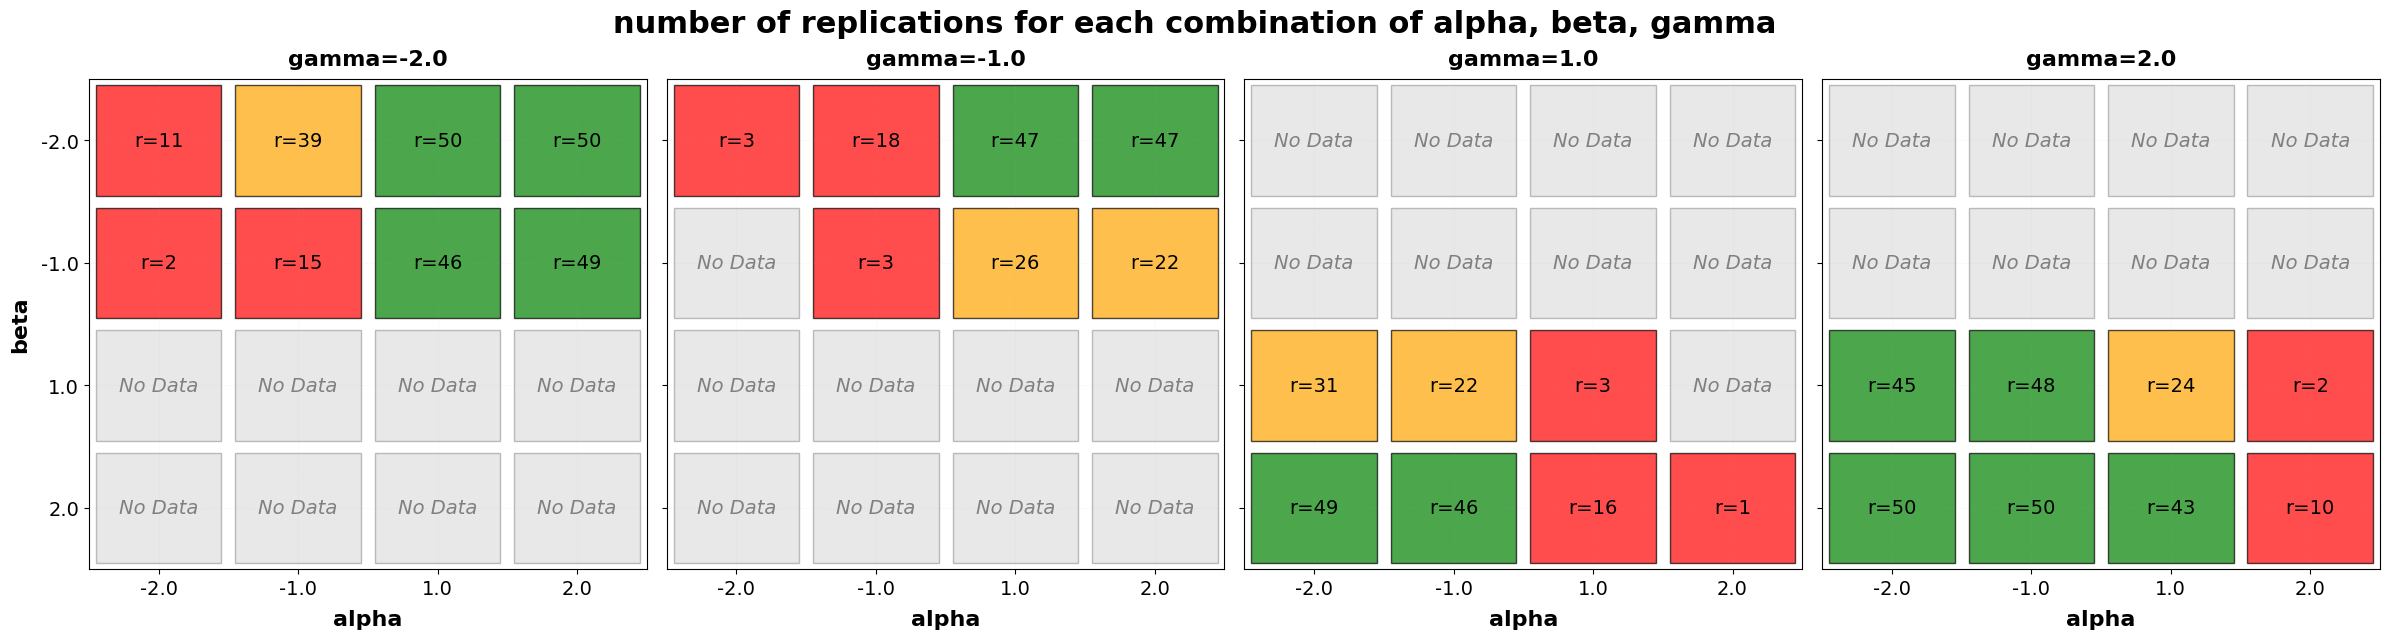

Grid configuration:
X-axis (alpha): [-2 -1  1  2]
Y-axis (beta): [-2 -1  1  2]
Separate plots (gamma): [-2 -1  1  2]
Grid size: 4 × 4 × 4

Figure layout: Single row with 4 plots
Figure size: 24.0 × 7.0 inches


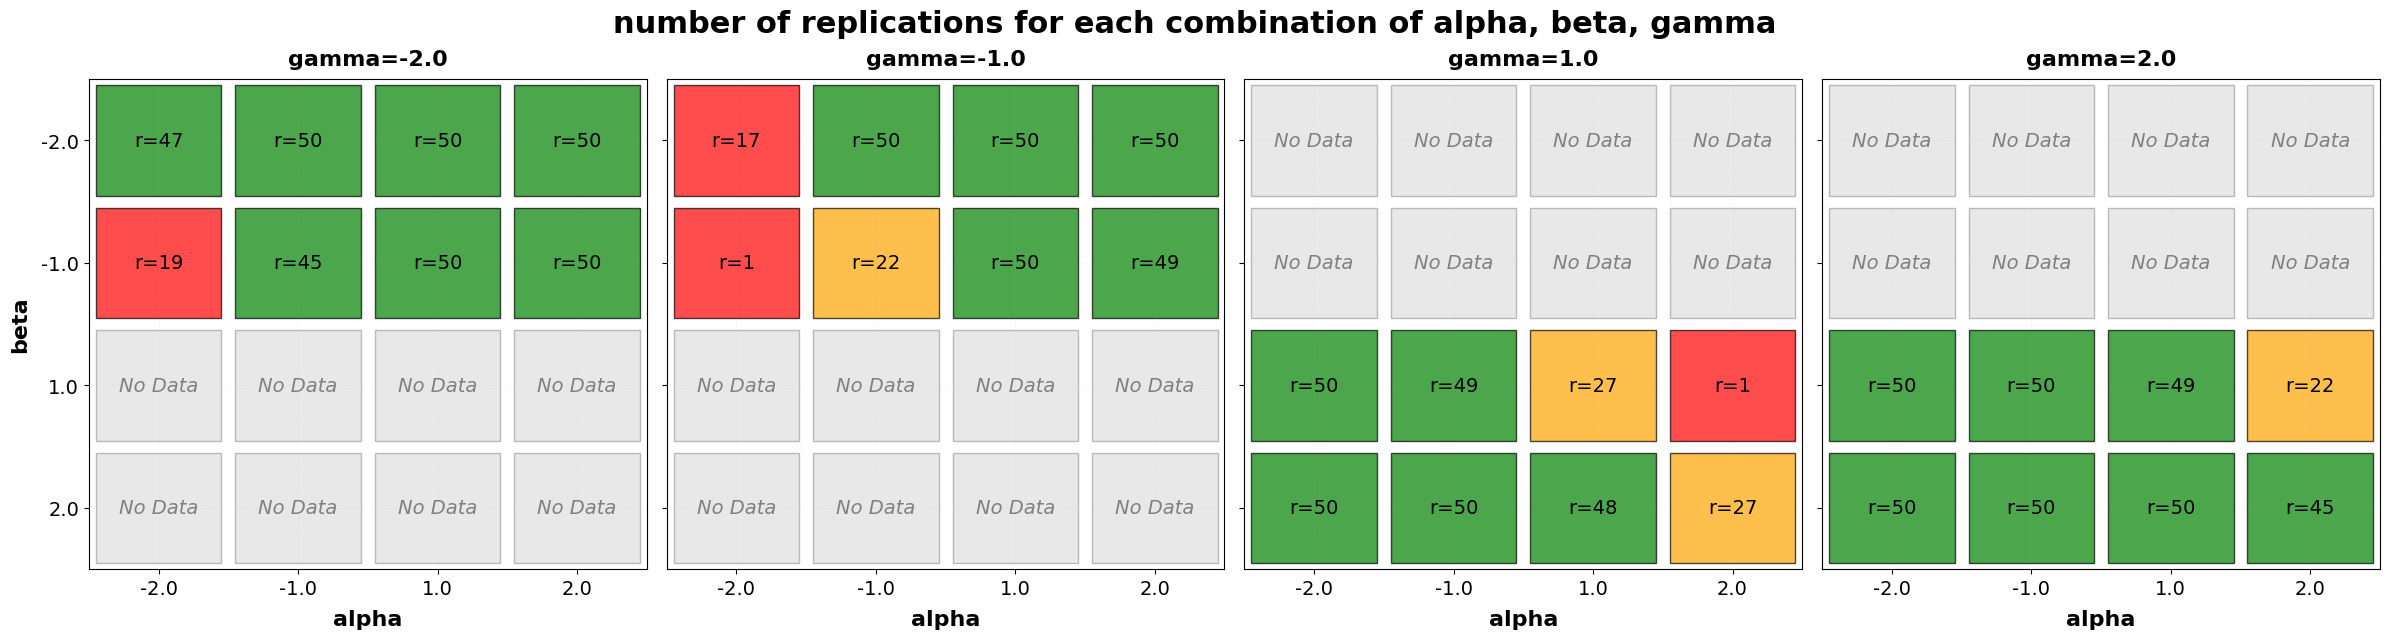

Grid configuration:
X-axis (alpha): [-2 -1  1  2]
Y-axis (beta): [-2 -1  1  2]
Separate plots (gamma): [-2 -1  1  2]
Grid size: 4 × 4 × 4

Figure layout: Single row with 4 plots
Figure size: 24.0 × 7.0 inches


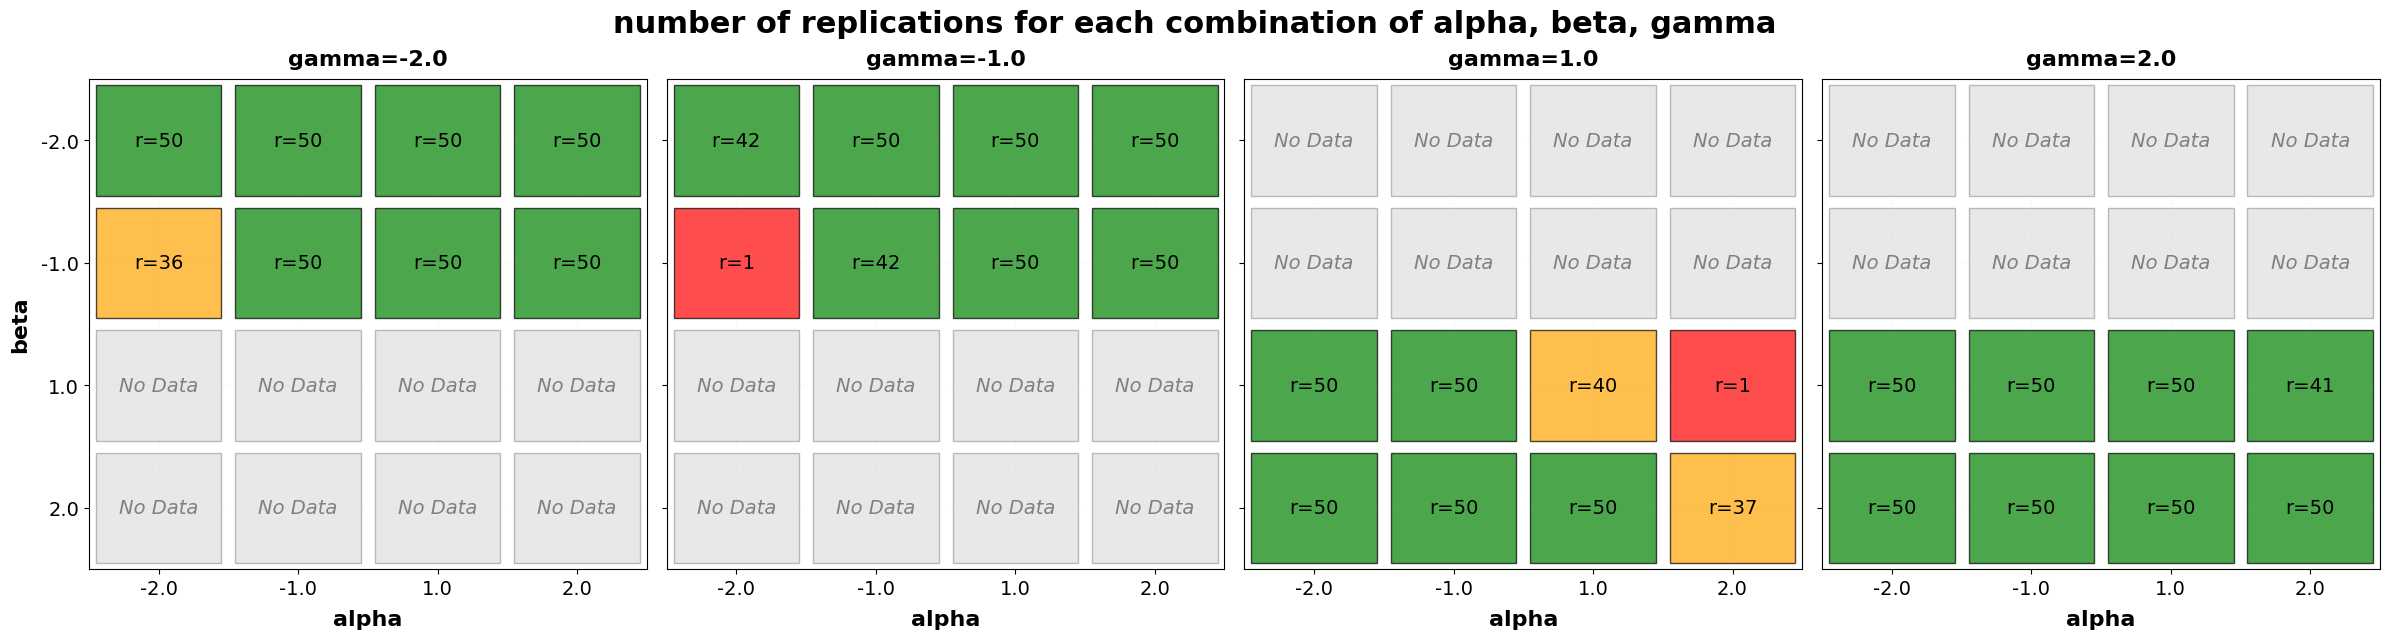

In [119]:
summary2 = plot_P_grid_single_row(results_100, 
                                       x_axis='alpha',
                                       y_axis='beta',
                                       sep_plots='gamma',
                                       param_values=[-2, -1, 1, 2])

summary2 = plot_P_grid_single_row(results_300, 
                                       x_axis='alpha',
                                       y_axis='beta',
                                       sep_plots='gamma',
                                       param_values=[-2, -1, 1, 2])

summary2 = plot_P_grid_single_row(results_1000, 
                                       x_axis='alpha',
                                       y_axis='beta',
                                       sep_plots='gamma',
                                       param_values=[-2, -1, 1, 2])

In [118]:
5**3*50


6250

In [ ]:
r2_train=['POIS_R2_train', 'NB_R2_train', 'ZK_H_P_R2_train', 'ZK_H_NB_R2_train', 'ZINB_R2_train', 'ZIP_R2_train', 'ZKINB_R2_train', 'ZKIP_R2_train', 'RF_R2_train', 'GB_R2_train']
r2=['POIS_R2_test', 'NB_R2_test', 'ZK_H_P_R2_test', 'ZK_H_NB_R2_test', 'ZINB_R2_test', 'ZIP_R2_test', 'ZKINB_R2_test', 'ZKIP_R2_test', 'RF_R2_test', 'GB_R2_test']
AIC=['POIS_AIC', 'NB_AIC', 'ZK_H_P_AIC', 'ZK_H_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC']
mse=['POIS_MSE_test', 'NB_MSE_test', 'ZK_H_P_MSE_test', 'ZK_H_NB_MSE_test', 'ZINB_MSE_test', 'ZIP_MSE_test', 'ZKINB_MSE_test', 'ZKIP_MSE_test', 'RF_MSE_test', 'GB_MSE_test']
mae_train=['POIS_MAE_train', 'NB_MAE_train', 'ZK_H_P_MAE_train', 'ZK_H_NB_MAE_train', 'ZINB_MAE_train', 'ZIP_MAE_train', 'ZKINB_MAE_train', 'ZKIP_MAE_train', 'RF_MAE_train', 'GB_MAE_train']
mae=['POIS_MAE_test', 'NB_MAE_test', 'ZK_H_P_MAE_test', 'ZK_H_NB_MAE_test', 'ZINB_MAE_test', 'ZIP_MAE_test', 'ZKINB_MAE_test', 'ZKIP_MAE_test', 'RF_MAE_test', 'GB_MAE_test']


In [131]:
def plot_grid_analysis(dfp, matrix_type='AIC', 
                       x_axis='beta', y_axis='gamma', 
                       sep_plots='alpha',
                       model_names=None, colors=None,
                       param_range=None, param_steps=5,
                       figsize_factor=4):
    """
    Flexible grid analysis plot for comparing model performance metrics.
    """
    
    # Define default model names and colors
    if model_names is None:
        if matrix_type == 'MAE':
            model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP', 'RF', 'GB']
        else:
            model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP']
    
    if colors is None:
        if matrix_type == 'MAE':
            colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 
                     'orange', 'brown', 'red', 'pink', 'darkgreen']
        else:
            colors = ['lightgreen', 'green', 'lightblue', 'blue', 
                     'yellow', 'orange', 'brown', 'red']
    
    # Define parameter columns
    param_cols = ['alpha', 'beta', 'gamma']
    
    # Validate inputs
    for param in [x_axis, y_axis, sep_plots]:
        if param not in param_cols:
            raise ValueError(f"Parameter must be one of {param_cols}, got '{param}'")
    
    if x_axis == y_axis or x_axis == sep_plots or y_axis == sep_plots:
        raise ValueError("x_axis, y_axis, and sep_plots must be different parameters")
    
    # Determine which matrix columns to use
    if isinstance(matrix_type, list):
        metric_cols = matrix_type
        matrix_label = 'Metric'
    elif matrix_type.upper() == 'AIC':
        # Assuming AIC columns follow a naming pattern
        metric_cols = [col for col in dfp.columns if 'AIC' in col.upper()]
        if not metric_cols:
            # Try common AIC column names
            aic_patterns = ['aic', 'AIC', '_aic', '_AIC']
            for pattern in aic_patterns:
                metric_cols = [col for col in dfp.columns if pattern in col.lower()]
                if metric_cols:
                    break
        matrix_label = 'AIC'
    elif matrix_type.upper() == 'MAE':
        # Assuming MAE columns follow a naming pattern
        metric_cols = [col for col in dfp.columns if '_MAE_TEST' in col.upper()]
        if not metric_cols:
            # Try common MAE column names
            mae_patterns = ['_mae', '_MAE', 'mae', 'MAE']
            for pattern in mae_patterns:
                metric_cols = [col for col in dfp.columns if pattern in col.upper()]
                if metric_cols:
                    break
        matrix_label = 'MAE'
    else:
        raise ValueError("matrix_type must be 'AIC', 'MAE', or a list of column names")
    
    if not metric_cols:
        raise ValueError(f"No {matrix_type} columns found in the DataFrame")
    
    print(f"Using {len(metric_cols)} {matrix_label} columns: {metric_cols}")
    
    # Create a mapping from column names to display names
    col_to_display = {}
    for col in metric_cols:
        col_upper = col.upper()
        if 'POIS' in col_upper or 'POISSON' in col_upper:
            col_to_display[col] = 'POIS'
        elif 'NB' in col_upper and 'ZK' not in col_upper and 'ZI' not in col_upper:
            col_to_display[col] = 'NB'
        elif 'ZK_H_P' in col_upper:
            col_to_display[col] = 'ZKHP'
        elif 'ZK_H_NB' in col_upper:
            col_to_display[col] = 'ZKHNB'
        elif 'ZINB' in col_upper:
            col_to_display[col] = 'ZINB'
        elif 'ZIP' in col_upper:
            col_to_display[col] = 'ZIP'
        elif 'ZKINB' in col_upper:
            col_to_display[col] = 'ZKINB'
        elif 'ZKIP' in col_upper:
            col_to_display[col] = 'ZKIP'
        elif 'RF' in col_upper:
            col_to_display[col] = 'RF'
        elif 'GB' in col_upper or 'GRADIENT' in col_upper:
            col_to_display[col] = 'GB'
        else:
            # Default: use first part of column name
            parts = col.split('_')
            col_to_display[col] = parts[0] if parts else col
    
    # Handle param_range input
    param_values = {}
    
    if param_range is None:
        # Default: linear spacing from -2 to 2
        for param in param_cols:
            param_values[param] = np.linspace(-2, 2, param_steps)
    
    elif isinstance(param_range, dict):
        # Custom values for each parameter
        for param in param_cols:
            if param in param_range:
                if isinstance(param_range[param], (list, np.ndarray)):
                    param_values[param] = np.array(param_range[param])
                else:
                    param_values[param] = np.linspace(param_range[param][0], param_range[param][1], param_steps)
            else:
                param_values[param] = np.linspace(-2, 2, param_steps)
    
    elif isinstance(param_range, (list, tuple, np.ndarray)):
        if len(param_range) == 2:
            # Range [min, max]
            for param in param_cols:
                param_values[param] = np.linspace(param_range[0], param_range[1], param_steps)
        else:
            # Specific values [-2, -1, 1, 2]
            for param in param_cols:
                param_values[param] = np.array(param_range)
    else:
        raise ValueError("param_range must be None, list/tuple, or dict")
    
    # Get the values for each axis
    x_values = param_values[x_axis]
    y_values = param_values[y_axis]
    sep_values = param_values[sep_plots]
    
    print(f"\nParameter values:")
    print(f"{x_axis} (x-axis): {x_values}")
    print(f"{y_axis} (y-axis): {y_values}")
    print(f"{sep_plots} (subplots): {sep_values}")
    
    # Set up figure
    sizz = figsize_factor
    tolerance = 1e-6
    best_models_summary = []
    
    # Create subplots - one for each value of the separation parameter
    n_plots = len(sep_values)
    n_cols = min(n_plots, 5)  # Max 5 columns
    n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(sizz * n_cols, sizz * n_rows + 1))
    
    # Flatten axes if needed
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    elif n_rows == 1:
        axes = axes.flatten()
    elif n_cols == 1:
        axes = axes.flatten()
    
    # Plot each subplot
    for plot_idx, sep_val in enumerate(sep_values):
        if plot_idx >= len(axes):
            break
            
        ax = axes[plot_idx]
        
        # Create grid
        for i, y_val in enumerate(y_values):
            for j, x_val in enumerate(x_values):
                x_pos = j  # x-axis position
                y_pos = len(y_values) - 1 - i  # y-axis position (inverted)
                
                # Build mask based on parameter values
                mask_conditions = [
                    (np.abs(dfp[sep_plots] - sep_val) < tolerance),
                    (np.abs(dfp[x_axis] - x_val) < tolerance),
                    (np.abs(dfp[y_axis] - y_val) < tolerance)
                ]
                
                # Combine conditions
                mask = np.all(mask_conditions, axis=0)
                filtered_data = dfp.loc[mask]
                
                if filtered_data.shape[0] > 20:
                    count = len(filtered_data)
                    
                    # Calculate mean metric for each model
                    metric_means = []
                    
                    for metric_col in metric_cols:
                        if metric_col in filtered_data.columns:
                            mean_val = filtered_data[metric_col].mean()
                            metric_means.append(mean_val if not np.isnan(mean_val) else np.inf)
                        else:
                            metric_means.append(np.inf)
                    
                    # Find best model (lower is better for both AIC and MAE)
                    if any(np.isfinite(m) for m in metric_means):
                        best_idx = np.argmin(metric_means)
                        best_metric = metric_means[best_idx]
                        
                        if np.isfinite(best_metric):
                            # Get model name using the mapping
                            metric_col_name = metric_cols[best_idx]
                            best_model_name = col_to_display.get(metric_col_name, metric_col_name)
                            
                            # Store summary
                            summary_entry = {
                                sep_plots: sep_val,
                                x_axis: x_val,
                                y_axis: y_val,
                                'best_model': best_model_name,
                                f'best_{matrix_label.lower()}': best_metric,
                                'count': count
                            }
                            best_models_summary.append(summary_entry)
                            
                            # Choose color - find index in model_names
                            try:
                                color_idx = model_names.index(best_model_name)
                            except ValueError:
                                # If not found, use modulo
                                color_idx = best_idx % len(colors)
                            
                            rect_color = colors[color_idx]
                            
                            # Add rectangle
                            rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                                facecolor=rect_color, edgecolor='black',
                                                alpha=0.9, linewidth=0.5)
                            ax.add_patch(rect)
                            
                            # Add text (model abbreviation)
                            font_size = max(12, 10 - len(sep_values)//2)
                            ax.text(x_pos, y_pos, best_model_name,
                                ha='center', va='center',
                                fontsize=font_size,
                                fontweight='bold',
                                color='black')
                        else:
                            # No valid metric values
                            rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                                facecolor='lightgray', edgecolor='gray',
                                                alpha=0.5, linewidth=0.5)
                            ax.add_patch(rect)
                    else:
                        # No valid models
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=0.5)
                        ax.add_patch(rect)
                else:
                    # No data
                    rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=0.5)
                    ax.add_patch(rect)
        
        # Set up plot limits and ticks
        ax.set_xlim(-0.5, len(x_values) - 0.5)
        ax.set_ylim(-0.5, len(y_values) - 0.5)
        ax.set_xticks(np.arange(len(x_values)))
        ax.set_yticks(np.arange(len(y_values)))
        
        # Set title
        title = f'{sep_plots}={sep_val:.1f}'
        ax.set_title(title, fontsize=10, fontweight='bold', pad=10)
        ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)
        
        # Set axis labels
        # Y-axis labels for first column
        if n_cols == 1 or plot_idx % n_cols == 0:
            ax.set_ylabel(f'{y_axis}', fontsize=10, fontweight='bold')
            y_labels = [f'{v:.1f}' if abs(v) >= 0.1 else f'{v:.1e}' for v in y_values[::-1]]
            ax.set_yticklabels(y_labels, fontsize=10)
        else:
            ax.set_yticklabels([])
        
        # X-axis labels for bottom row
        if n_rows == 1 or plot_idx >= (n_rows - 1) * n_cols:
            ax.set_xlabel(f'{x_axis}', fontsize=10, fontweight='bold')
            x_labels = [f'{v:.1f}' if abs(v) >= 0.1 else f'{v:.1e}' for v in x_values]
            ax.set_xticklabels(x_labels, fontsize=10)
        else:
            ax.set_xticklabels([])
    
    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)
    
    # Add legend
    legend_elements = []
    for i, model in enumerate(model_names):
        if i < len(colors):
            legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                        alpha=0.9, label=model))
    
    # Adjust legend columns based on number of models
    ncol_legend = min(len(model_names), 8)
    fig.legend(handles=legend_elements, loc='lower center', 
              ncol=ncol_legend, fontsize=10, 
              title=f'Models (Best {matrix_label})', title_fontsize=12,
              bbox_to_anchor=(0.5, -0.05/n_rows))
    
    # Main title
    title_text = f'Best Model by {matrix_label}'
    plt.suptitle(title_text, fontsize=14, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    bottom_margin = 0.15 + 0.05 * n_rows
    plt.subplots_adjust(bottom=bottom_margin)
    plt.show()

Using 10 MAE columns: ['POIS_MAE_test', 'NB_MAE_test', 'ZK_H_P_MAE_test', 'ZK_H_NB_MAE_test', 'ZINB_MAE_test', 'ZIP_MAE_test', 'ZKINB_MAE_test', 'ZKIP_MAE_test', 'RF_MAE_test', 'GB_MAE_test']

Parameter values:
alpha (x-axis): [-2 -1  1  2]
beta (y-axis): [-2 -1  1  2]
gamma (subplots): [-2 -1  1  2]


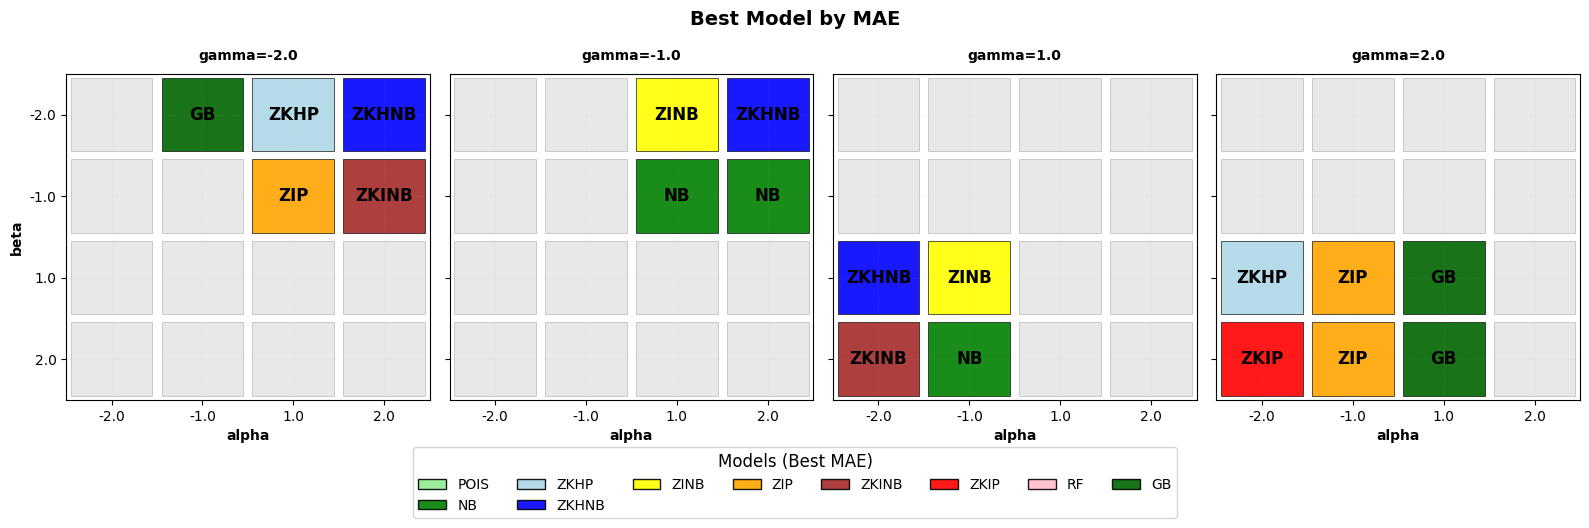

In [143]:
 plot_grid_analysis(results_100, matrix_type='MAE', 
                        x_axis='alpha', y_axis='beta', 
                        sep_plots='gamma',
                        param_range=[-2, -1, 1, 2])

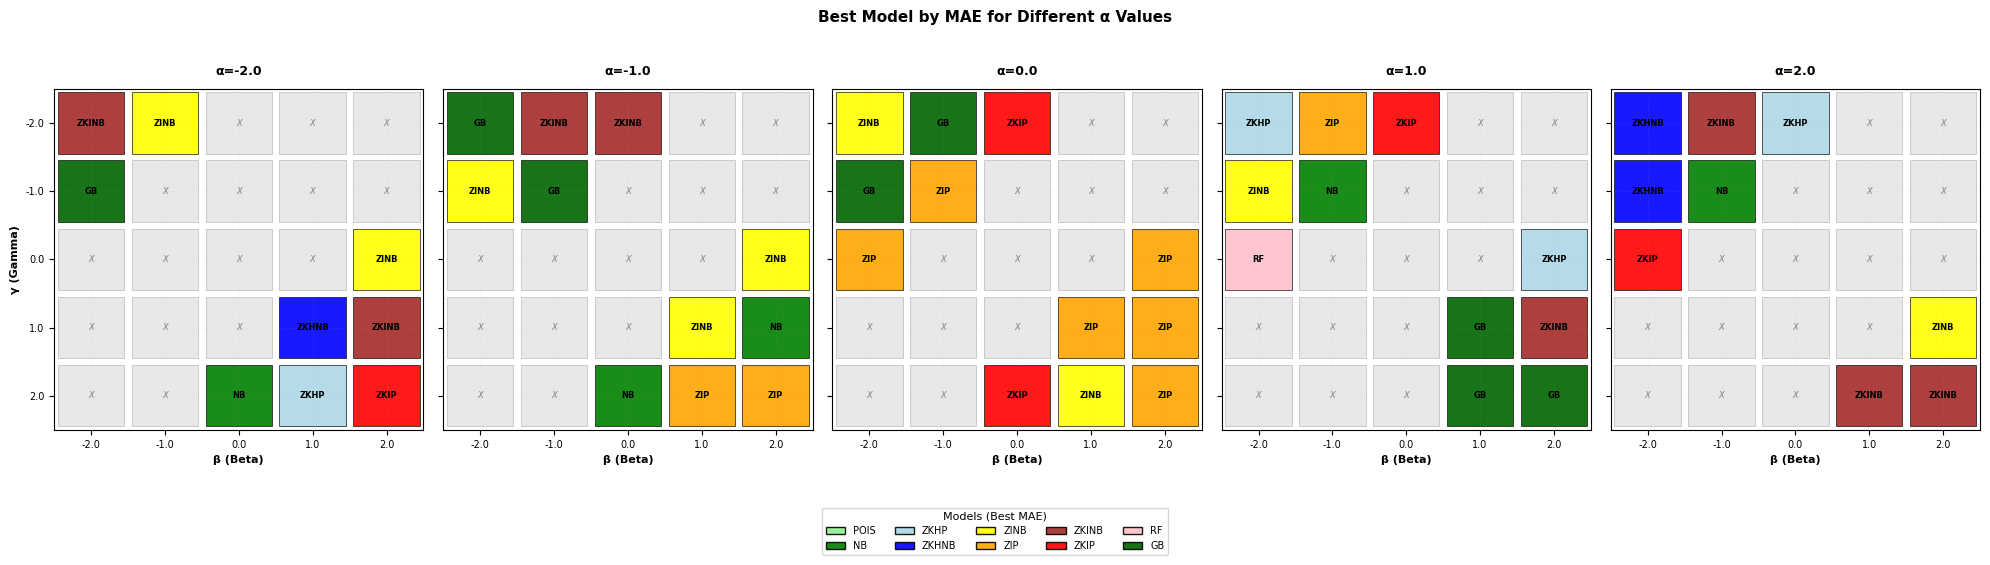

In [121]:
# MAE winners - Reorganized with alpha as separate plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_mae_alpha_grid(dfp):
    # List of MAE columns for different models
    AIC_columns = mae  # Make sure 'mae' is defined globally
    
    # Shorter model names for display
    model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP', 'RF', 'GB']
    
    # Colors for each model
    colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red', 'pink', 'darkgreen']
    
    # Generate alpha, beta, and gamma values
    alphas = np.linspace(-2, 2, 5)  # Now alphas determine subplots
    beta_values = np.linspace(-2, 2, 5)  # X-axis
    gammas = np.linspace(-2, 2, 5)  # Y-axis
    
    # Set compact figure size
    sizz = 4
    tolerance = 1e-6
    best_models_summary = []
    
    # Create a single figure with subplots for each alpha (horizontal arrangement)
    fig, axes = plt.subplots(1, len(alphas), figsize=(sizz * len(alphas), sizz + 1))
    
    # If only one alpha value, axes won't be an array
    if len(alphas) == 1:
        axes = [axes]
    
    for alpha_idx, (alpha_val, ax) in enumerate(zip(alphas, axes)):
        # Create grid with beta on x-axis, gamma on y-axis
        for i, gamma in enumerate(gammas):
            for j, beta in enumerate(beta_values):
                x_pos = j  # beta position
                y_pos = len(gammas) - 1 - i  # gamma position (inverted)
                
                # Use tolerance for float comparison
                mask = (
                    (np.abs(dfp['alpha'] - alpha_val) < tolerance) & 
                    (np.abs(dfp['gamma'] - gamma) < tolerance) & 
                    (np.abs(dfp['beta'] - beta) < tolerance)
                )
                filtered_data = dfp.loc[mask]
                
                if not filtered_data.empty:
                    count = len(filtered_data)
                    
                    # Calculate mean MAE for EACH model across the filtered rows
                    mae_means = []
                    valid_models = []
                    
                    for idx, mae_col in enumerate(AIC_columns):
                        if mae_col in filtered_data.columns:
                            mean_mae = filtered_data[mae_col].mean()
                            if not np.isnan(mean_mae):
                                mae_means.append(mean_mae)
                                valid_models.append(idx)
                            else:
                                mae_means.append(np.inf)
                                valid_models.append(idx)
                        else:
                            mae_means.append(np.inf)
                            valid_models.append(idx)
                    
                    if valid_models:
                        best_idx = np.argmin(mae_means)  # Lower MAE is better
                        best_mae = mae_means[best_idx]
                        
                        if np.isfinite(best_mae):
                            best_model_name = model_names[best_idx] if best_idx < len(model_names) else AIC_columns[best_idx]
                            
                            # Store for summary
                            best_models_summary.append({
                                'alpha': alpha_val,
                                'beta': beta,
                                'gamma': gamma,
                                'best_model': best_model_name,
                                'best_mae': best_mae,
                                'count': count
                            })
                            
                            # Create compact text - ONLY show model abbreviation
                            text = f"{best_model_name}"
                            
                            # Choose color based on model type
                            color_idx = best_idx % len(colors)
                            rect_color = colors[color_idx]
                            
                            # Smaller rectangle for compact display
                            rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                                facecolor=rect_color, edgecolor='black',
                                                alpha=0.9, linewidth=0.5)
                            ax.add_patch(rect)
                            
                            # Smaller font, just model name
                            ax.text(x_pos, y_pos, text,
                                ha='center', va='center',
                                fontsize=6,
                                fontweight='bold',
                                color='black')
                        else:
                            # No valid MAE values - gray cell
                            rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                                facecolor='lightgray', edgecolor='gray',
                                                alpha=0.5, linewidth=0.5)
                            ax.add_patch(rect)
                            ax.text(x_pos, y_pos, "X",
                                ha='center', va='center',
                                fontsize=6, color='gray')
                    else:
                        # No valid models - gray cell
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=0.5)
                        ax.add_patch(rect)
                        ax.text(x_pos, y_pos, "X",
                            ha='center', va='center',
                            fontsize=6, color='gray')
                        
                else:
                    # No data - gray cell
                    rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=0.5)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "X",
                        ha='center', va='center',
                        fontsize=6, color='gray', style='italic')
        
        # Set up the plot
        ax.set_xlim(-0.5, len(beta_values) - 0.5)
        ax.set_ylim(-0.5, len(gammas) - 0.5)
        ax.set_xticks(np.arange(len(beta_values)))
        ax.set_yticks(np.arange(len(gammas)))
        
        # Set title for each subplot (alpha value)
        ax.set_title(f'α={alpha_val:.1f}', fontsize=9, fontweight='bold', pad=10)
        ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)
        
        # Only label outer axes to reduce clutter
        if alpha_idx == 0:  # First plot
            ax.set_ylabel('γ (Gamma)', fontsize=8, fontweight='bold')
            ax.set_yticklabels([f'{g:.1f}' for g in gammas[::-1]], fontsize=7)
        else:
            ax.set_yticklabels([])
        
        # Always show x-axis labels but smaller
        ax.set_xlabel('β (Beta)', fontsize=8, fontweight='bold')
        ax.set_xticklabels([f'{b:.1f}' for b in beta_values], fontsize=7)
    
    # Add a shared legend at the bottom
    from matplotlib.patches import Patch
    legend_elements = []
    for i, model in enumerate(model_names):
        if i < len(colors):
            legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                        alpha=0.9, label=model))
    
    # Place legend at the bottom, centered
    fig.legend(handles=legend_elements, loc='lower center', 
            ncol=min(5, len(model_names)), fontsize=7,  # Adjust columns based on number of models
            title='Models (Best MAE)', title_fontsize=8,
            bbox_to_anchor=(0.5, -0.08))  # Adjusted position
    
    plt.suptitle('Best Model by MAE for Different α Values', fontsize=11, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.18)  # Make room for bottom legend (increased for 10 models)
    plt.show()
    
    return best_models_summary

# Usage
dfp = results_100

# Option 1: Single row (best for ≤3 alpha values)
best_models = plot_mae_alpha_grid(dfp)

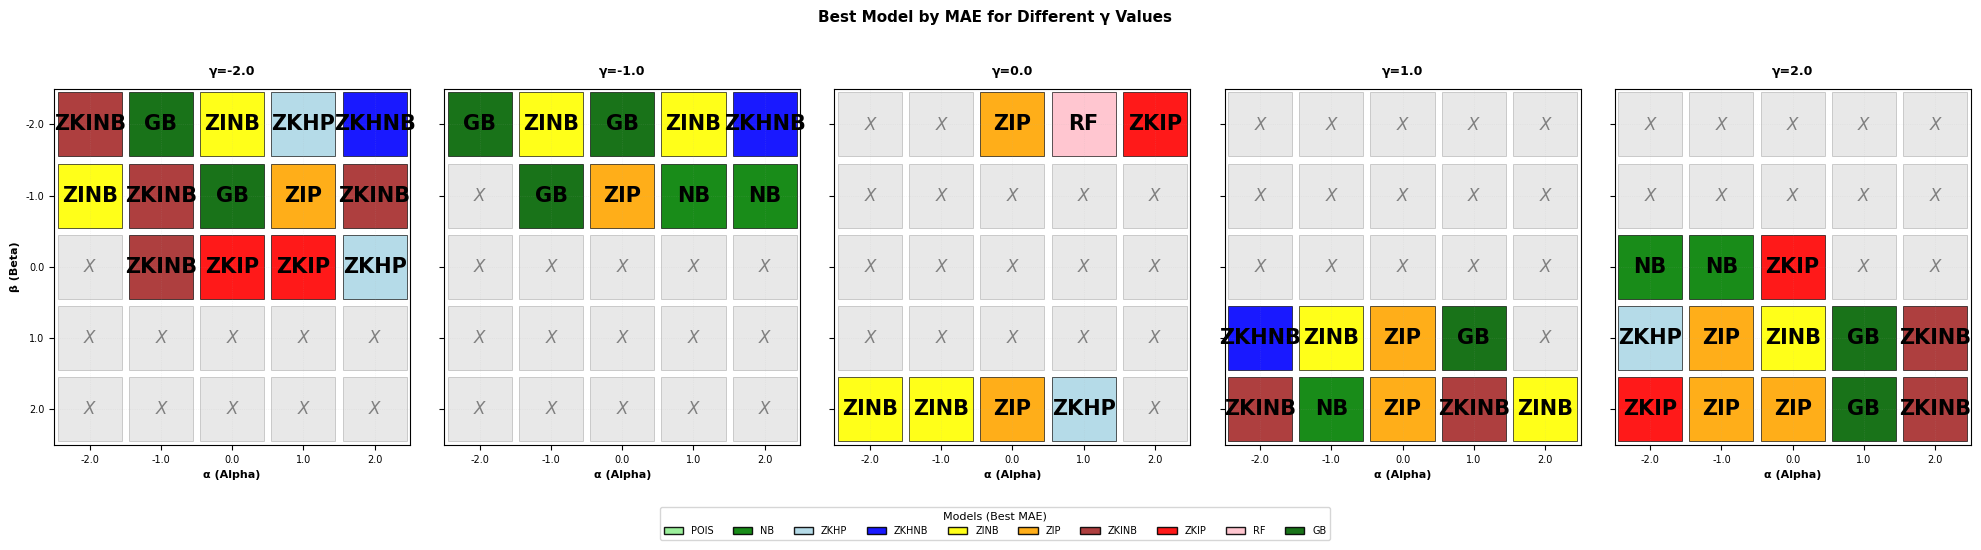

In [ ]:

# MAE winners - Compact version with axis swap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_100

# List of AIC columns for different models
AIC_columns = mae

# Shorter model names for display
model_names = ['POIS', 'NB', 'ZKHP', 'ZKHNB', 'ZINB', 'ZIP', 'ZKINB', 'ZKIP', 'RF', 'GB']

# Colors for each model
colors = ['lightgreen', 'green', 'lightblue', 'blue', 'yellow', 'orange', 'brown', 'red', 'pink', 'darkgreen']

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

# Set compact figure size
sizz = 4
tolerance = 1e-6
best_models_summary = []

# AXIS SWAP: Use gamma values for subplots (instead of beta)
fig, axes = plt.subplots(1, len(gammas), figsize=(sizz * len(gammas), sizz + 1))

# If only one gamma value, axes won't be an array
if len(gammas) == 1:
    axes = [axes]

# AXIS SWAP: Loop through gamma values for subplots (instead of beta)
for gamma_idx, (gamma_val, ax) in enumerate(zip(gammas, axes)):
    # AXIS SWAP: beta becomes y-axis (inner loop)
    for i, beta_val in enumerate(beta_values):
        # AXIS SWAP: alpha becomes x-axis (inner-inner loop)
        for j, alpha in enumerate(alphas):
            x_pos = j  # alpha values on x-axis
            y_pos = len(beta_values) - 1 - i  # beta values on y-axis
            
            # Use tolerance for float comparison with swapped axes
            mask = (
                (np.abs(dfp['alpha'] - alpha) < tolerance) & 
                (np.abs(dfp['gamma'] - gamma_val) < tolerance) & 
                (np.abs(dfp['beta'] - beta_val) < tolerance)
            )
            filtered_data = dfp.loc[mask]
            p_0_mean = np.mean(filtered_data['p_0']) if not filtered_data.empty else np.nan
            p_k_mean = np.mean(filtered_data['p_k']) if not filtered_data.empty else np.nan
            p_p_mean = np.mean(filtered_data['p_p']) if not filtered_data.empty else np.nan
            
            if not filtered_data.empty:
                count = len(filtered_data)
                
                # Calculate mean AIC for EACH model across the filtered rows
                aic_means = []
                valid_models = []
                
                for idx, aic_col in enumerate(AIC_columns):
                    if aic_col in filtered_data.columns:
                        mean_aic = filtered_data[aic_col].mean()
                        if not np.isnan(mean_aic):
                            aic_means.append(mean_aic)
                            valid_models.append(idx)
                        else:
                            aic_means.append(np.inf)
                            valid_models.append(idx)
                    else:
                        aic_means.append(np.inf)
                        valid_models.append(idx)
                
                if valid_models:
                    best_idx = np.argmin(aic_means)
                    best_aic = aic_means[best_idx]
                    
                    if np.isfinite(best_aic):
                        best_model_name = model_names[best_idx] if best_idx < len(model_names) else AIC_columns[best_idx]
                        
                        # Store for summary
                        best_models_summary.append({
                            'beta': beta_val,
                            'alpha': alpha,
                            'gamma': gamma_val,
                            'best_model': best_model_name,
                            'best_aic': best_aic,
                            'count': count, 
                            'p_0': p_0_mean,
                            'p_k': p_k_mean,
                            'p_p': p_p_mean
                        })
                        
                        # Create compact text - ONLY show model abbreviation
                        text = f"{best_model_name}"
                        
                        # Choose color based on model type
                        color_idx = best_idx % len(colors)
                        rect_color = colors[color_idx]
                        
                        # Smaller rectangle for compact display
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor=rect_color, edgecolor='black',
                                            alpha=0.9, linewidth=0.5)
                        ax.add_patch(rect)
                        
                        # Smaller font, just model name
                        ax.text(x_pos, y_pos, text,
                               ha='center', va='center',
                               fontsize=15,
                               fontweight='bold',
                               color='black')
                    else:
                        # No valid AIC values - gray cell
                        rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                            facecolor='lightgray', edgecolor='gray',
                                            alpha=0.5, linewidth=0.5)
                        ax.add_patch(rect)
                        ax.text(x_pos, y_pos, "X",
                               ha='center', va='center',
                               fontsize=6, color='gray')
                else:
                    # No valid models - gray cell
                    rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=0.5)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "X",
                           ha='center', va='center',
                           fontsize=6, color='gray')
                    
            else:
                # No data - gray cell
                rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=0.5)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "X",
                       ha='center', va='center',
                       fontsize=12, color='gray', style='italic')
    
    # Set up the plot with swapped axes
    ax.set_xlim(-0.5, len(alphas) - 0.5)  # alpha on x-axis
    ax.set_ylim(-0.5, len(beta_values) - 0.5)  # beta on y-axis
    ax.set_xticks(np.arange(len(alphas)))
    ax.set_yticks(np.arange(len(beta_values)))
    
    # Only label outer axes to reduce clutter
    if gamma_idx == 0:  # First plot
        ax.set_ylabel('β (Beta)', fontsize=8, fontweight='bold')  # Changed to beta
        ax.set_yticklabels([f'{b:.1f}' for b in beta_values[::-1]], fontsize=7)
    else:
        ax.set_yticklabels([])
    
    # Always show x-axis labels but smaller
    ax.set_xlabel('α (Alpha)', fontsize=8, fontweight='bold')  # Changed to alpha
    ax.set_xticklabels([f'{a:.1f}' for a in alphas], fontsize=7)
    
    # Title shows gamma value (since that's now the subplot dimension)
    ax.set_title(f'γ={gamma_val:.1f}', fontsize=9, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)

# Add a shared legend at the bottom
from matplotlib.patches import Patch
legend_elements = []
for i, model in enumerate(model_names):
    if i < len(colors):
        legend_elements.append(Patch(facecolor=colors[i], edgecolor='black', 
                                    alpha=0.9, label=model))

# Place legend at the bottom, centered
fig.legend(handles=legend_elements, loc='lower center', 
           ncol=len(model_names), fontsize=7, 
           title='Models (Best MAE)', title_fontsize=8,
           bbox_to_anchor=(0.5, -0.05))

plt.suptitle('Best Model by MAE for Different γ Values', fontsize=11, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()




In [11]:
bm=pd.DataFrame(best_models_summary)
bm['best_model'].value_counts()/bm['best_model'].shape[0]

best_model
ZINB     0.173077
ZIP      0.173077
ZKINB    0.153846
GB       0.153846
ZKIP     0.096154
NB       0.096154
ZKHP     0.076923
ZKHNB    0.057692
RF       0.019231
Name: count, dtype: float64

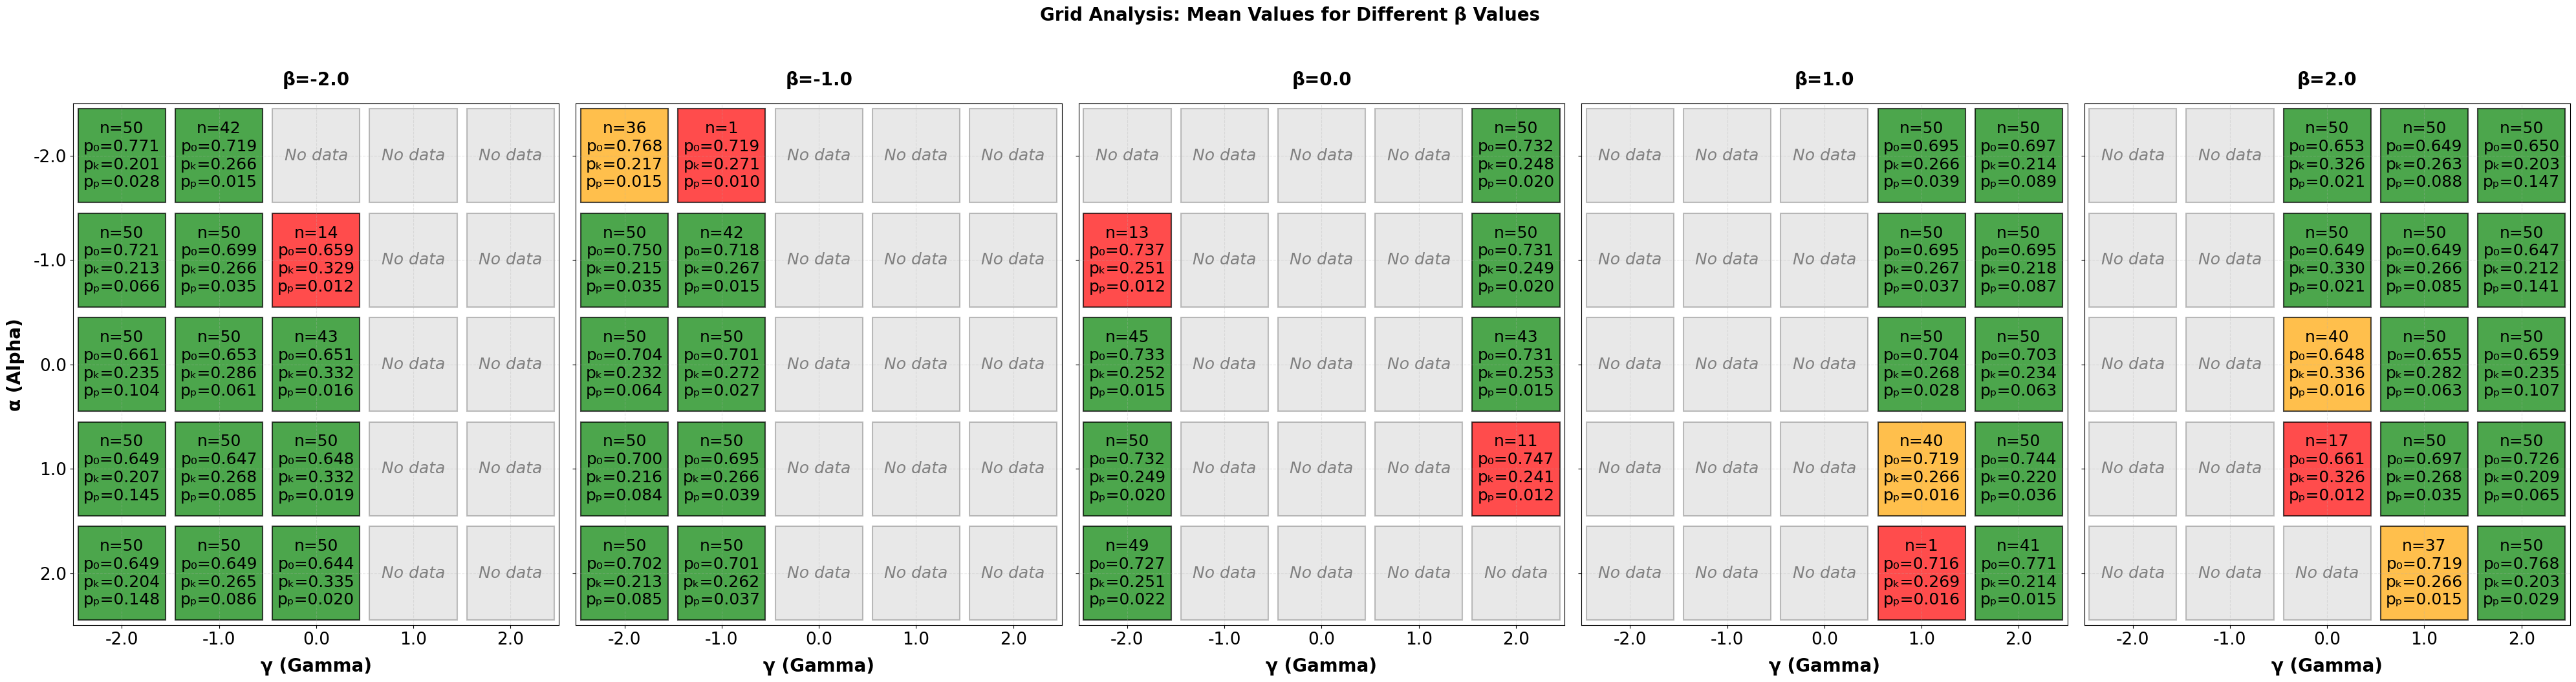

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfp = results_1000

# Generate alpha, beta, and gamma values
beta_values = np.linspace(-2, 2, 5)
alphas = np.linspace(-2, 2, 5)
gammas = np.linspace(-2, 2, 5)

# Increased sizes
sizz = 8  # Increased from 6
cell_font_size = 18  # Font size for cell text
axis_font_size = 20  # Font size for axis labels
title_font_size = 20  # Font size for subplot titles
suptitle_font_size = 20  # Font size for main title

# Create a single figure with subplots in one row - larger overall
fig, axes = plt.subplots(1, len(beta_values), 
                         figsize=(sizz * len(beta_values), sizz + 2))  # Increased height

# If only one beta value, axes won't be an array
if len(beta_values) == 1:
    axes = [axes]

for beta_idx, (beta_val, ax) in enumerate(zip(beta_values, axes)):
    # Create a grid
    for i, alpha in enumerate(alphas):
        for j, gamma in enumerate(gammas):
            x_pos = j  # gamma on x-axis
            y_pos = len(alphas) - 1 - i  # alpha on y-axis (inverted for correct orientation)
            
            # Fixed the mask - using beta_val instead of beta
            mask = (dfp['alpha'] == alpha) & (dfp['gamma'] == gamma) & (dfp['beta'] == beta_val)
            filtered_data = dfp.loc[mask]
            
            if not filtered_data.empty:
                # Calculate means
                mean_p0 = np.mean(filtered_data['p_0'])
                mean_pk = np.mean(filtered_data['p_k'])
                mean_pp = np.mean(filtered_data['p_p'])
                count = len(filtered_data)
                
                # Create annotation box
                text = f"n={count}\n"
                text += f"p₀={mean_p0:.3f}\n"
                text += f"pₖ={mean_pk:.3f}\n"
                text += f"pₚ={mean_pp:.3f}"
                
                if count > 40:
                    fc = 'green'
                elif count > 20:
                    fc = 'orange'
                else:
                    fc = 'red'
                
                # Add background rectangle - slightly larger for better text fit
                rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                    facecolor=fc, edgecolor='black',
                                    alpha=0.7, linewidth=1.5)
                ax.add_patch(rect)
                
                # Add text with increased font size
                ax.text(x_pos, y_pos, text,
                       ha='center', va='center',
                       fontsize=cell_font_size, 
                       fontweight='normal',
                       linespacing=1.2)
            else:
                # No data
                rect = plt.Rectangle((x_pos - 0.45, y_pos - 0.45), 0.9, 0.9,
                                    facecolor='lightgray', edgecolor='gray',
                                    alpha=0.5, linewidth=1.5)
                ax.add_patch(rect)
                ax.text(x_pos, y_pos, "No data",
                       ha='center', va='center',
                       fontsize=cell_font_size, 
                       color='gray', 
                       style='italic')
    
    # Set up the plot
    ax.set_xlim(-0.5, len(gammas) - 0.5)
    ax.set_ylim(-0.5, len(alphas) - 0.5)
    ax.set_xticks(np.arange(len(gammas)))
    ax.set_yticks(np.arange(len(alphas)))
    
    # Set titles and labels with increased font sizes
    ax.set_title(f'β={beta_val:.1f}', 
                 fontsize=title_font_size, 
                 fontweight='bold', 
                 pad=20)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    
    # Set x and y labels with increased font sizes
    # Only show y-axis label for first plot
    if beta_idx == 0:
        ax.set_ylabel('α (Alpha)', 
                      fontsize=axis_font_size, 
                      fontweight='bold',
                      labelpad=10)
        ax.set_yticklabels([f'{a:.1f}' for a in alphas[::-1]], 
                           fontsize=axis_font_size - 1)
    else:
        ax.set_yticklabels([])
    
    # Always show x-axis labels
    ax.set_xlabel('γ (Gamma)', 
                  fontsize=axis_font_size, 
                  fontweight='bold',
                  labelpad=10)
    
    # Set tick labels with increased font size
    ax.set_xticklabels([f'{g:.1f}' for g in gammas], 
                       fontsize=axis_font_size - 1)

# Add main title with increased font size
plt.suptitle('Grid Analysis: Mean Values for Different β Values', 
             fontsize=suptitle_font_size, 
             fontweight='bold', 
             y=1.05)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for suptitle
plt.show()

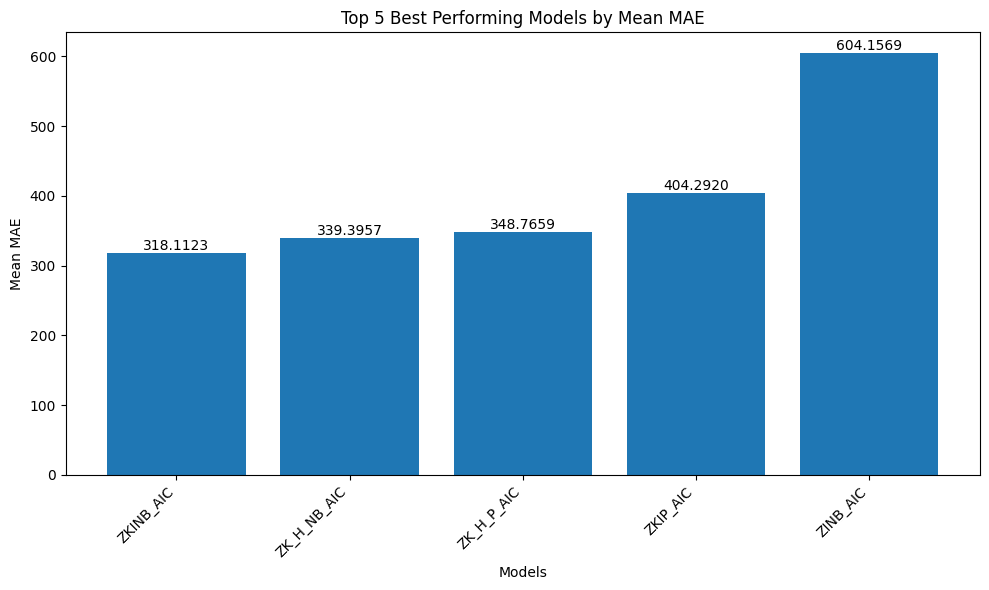

Top 5 models (lowest MAE):
ZKINB_AIC      318.112285
ZK_H_NB_AIC    339.395672
ZK_H_P_AIC     348.765859
ZKIP_AIC       404.291963
ZINB_AIC       604.156860
dtype: float64


In [13]:
import matplotlib.pyplot as plt

# Sort the mean MAE values (ascending order since lower MAE is better)
sorted_means = results_300[AIC].mean().sort_values()

# Get the top 5 best (lowest MAE) models
top_5 = sorted_means.head(5)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5.index, top_5.values)
plt.xlabel('Models')
plt.ylabel('Mean MAE')
plt.title('Top 5 Best Performing Models by Mean MAE')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Print the sorted results
print("Top 5 models (lowest MAE):")
print(top_5)